# Eksamenstrening, analyse

In [5]:
# =============================================
# Advertising data
# =============================================
#
# Summary: 
# These are records of sales and advertising budgets
# from 200 different markets
#
# Data description: 
# The data set consists of the following 4 variables:
# Response variable:
#  Sales: sales in thousands of units
# Covariates:
#  TV: budget for advertising on TV in thousands of dollars 
#  Radio: budget for advertising on radio in thousands of dollars 
#  Newspaper: budget for advertising in newspapers in thousands of dollars 
#
#======================================================

# Read the data
advertising <- read.csv("http://www.uio.no/studier/emner/matnat/math/STK2100/data/advertising.csv")

# Fit model
fit.lm <- lm(Sales ~ TV + Radio + Newspaper, data=advertising)
summary(fit.lm)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


Vi ser at $R^2 = 0.8972$, som betyr at ~90% av variasjonen i `Sales` forklares av modellen, noe som er meget høyt og bra. Vi ser også at p-verdien er 2.2e-16, noe som betyr at modellen samlet sett forkaster $H_0$ (nullhypotesen), og at modellen har signifikant forklaringskraft.

På variabelnivå har TV og Radio signifikant forklaringskraft (høy t-verdi i kombinasjon med meget lav P-verdi (< 5%): nullhypotesen forkastes), mens Newspaper har en lav t-verdi i kombinasjon med høy P-verdi (> 5%). Denne er med andre ord ikke signifikant, og kan fjernes i en oppdatert modell.

In [13]:
# Forward selection
library(leaps)
regfit.fwd <- regsubsets(Sales ~ TV + Radio + Newspaper, data = advertising, nvmax = 10, method = "forward")
summary.regfit.fwd <- summary(regfit.fwd)
summary.regfit.fwd


Subset selection object
Call: regsubsets.formula(Sales ~ TV + Radio + Newspaper, data = advertising, 
    nvmax = 10, method = "forward")
3 Variables  (and intercept)
          Forced in Forced out
TV            FALSE      FALSE
Radio         FALSE      FALSE
Newspaper     FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: forward
         TV  Radio Newspaper
1  ( 1 ) "*" " "   " "      
2  ( 1 ) "*" "*"   " "      
3  ( 1 ) "*" "*"   "*"      

In [17]:
fit.fwd <- lm(Sales ~ TV + Radio, data = advertising)
summary(fit.fwd)


Call:
lm(formula = Sales ~ TV + Radio, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7977 -0.8752  0.2422  1.1708  2.8328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92110    0.29449   9.919   <2e-16 ***
TV           0.04575    0.00139  32.909   <2e-16 ***
Radio        0.18799    0.00804  23.382   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.681 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


Vi ser her rekkefølgen i en forward selection. Modellen velger altså TV først, deretter Radio og til slutt Newspaper. La oss ta et litt mer avansert datasett: *Hitters*



In [19]:
# =============================================
# Hitters data
# =============================================
#
# Summary: 
# These are Major League Baseball data from the 
# 1986 and 1987 seasons. This dataset was taken 
# from the StatLib library. The salary data were 
# originally from Sports Illustrated, April 20, 1987. 
# The 1986 and career statistics were obtained from 
# The 1987 Baseball Encyclopedia Update. 
#
# Data description: 
# The data set consists of the following 20 variables:
# Response variable:
#  Salary: annual salary on opening day in thousands of dollars
# Covariates:
#  AtBat: Number of times at bat 
#  Hits: Number of hits
#  HmRun: Number of home runs
#  Runs: Number of runs 
#  RBI: Number of runs batted
#  Walks: Number of walks
#  Years: Number of years in the major leagues 
#  CAtBat: Number of times at bat during his career 
#  CHits: Number of hits during his career
#  CHmRun: Number of home runs during his career
#  CRuns: Number of runs during his career
#  CRBI: Number of runs batted in during his career
#  CWalks: Number of walks during his career
#  League: A factor with levels A and N indicating player’s league at the end of the first year 
#  Division: A factor with levels E and W indicating player’s division at the end of the first year 
#  PutOuts: Number of put outs
#  Assists: Number of assists
#  Errors: Number of errors
#  NewLeague: A factor with levels A and N indicating player’s league at the beginning of the second year
#
#======================================================

# The data are available in the R package ISLR
library(ISLR)
data("Hitters")
Hitters = na.omit(Hitters) #remove missing values

In [22]:
# vi fitter en full variant
fit.lm <- lm(Salary ~ . , data=Hitters)
summary(fit.lm)


Call:
lm(formula = Salary ~ ., data = Hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.62 -178.35  -31.11  139.09 1877.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  163.10359   90.77854   1.797 0.073622 .  
AtBat         -1.97987    0.63398  -3.123 0.002008 ** 
Hits           7.50077    2.37753   3.155 0.001808 ** 
HmRun          4.33088    6.20145   0.698 0.485616    
Runs          -2.37621    2.98076  -0.797 0.426122    
RBI           -1.04496    2.60088  -0.402 0.688204    
Walks          6.23129    1.82850   3.408 0.000766 ***
Years         -3.48905   12.41219  -0.281 0.778874    
CAtBat        -0.17134    0.13524  -1.267 0.206380    
CHits          0.13399    0.67455   0.199 0.842713    
CHmRun        -0.17286    1.61724  -0.107 0.914967    
CRuns          1.45430    0.75046   1.938 0.053795 .  
CRBI           0.80771    0.69262   1.166 0.244691    
CWalks        -0.81157    0.32808  -2.474 0.014057 *  
LeagueN       62.5

**Residuals:**
Vi ser at medianen i residualene er -31.11, den minste residualen er -907.62 og den største residualen er 1877.04. Det betyr at fordelingen er litt venstreskjev. Siden $1Q > |3Q|$ har vi en litt positiv skjevhet, altså er fordelingen høyreskjev. Det at $\max = 2 \times |\min|$ kan det tyde på at vi har noen outliere i fordelingen.

**Koeffisienter:**
`Estimate` er regresjonskoeffisienten ($\Beta$), som forteller noe om hva utgangsvariabelen forventes å endre seg med dersom den tilhørende kovariaten økes med én enhet, forutsatt at alle  andre variabler holdes fast.

`Std. Error` er standardavviket til prediktoren; denne måler usikkerheten i estimatet. Brukes til å beregne t-verdi, som tester om koeffisienten er signifikant forskjellig fra null.

`t value` beregnes av `Estimate / Std. Error`, og brukes til å teste nullhypotese $H_0: \beta = 0$, altså at variabelen ikke har effekt. Høy verdi tyder på at den er viktig (avviket er lavt eller estimatet er svært høyt).

`Pr(>|t|)` er P-verdien. "Hvor sannsynlig er `t value`, gitt nullhypotesen?". Dersom denne er < 0.05 (5%) forkaster vi nullhypotesen og beholde prediktoren, siden den er signifikant nok til å være forklarende for modellen.

Vi kan se at `Walks` er den mest signifikante prediktoren, siden den har en høy t-verdi i kombinasjon med en lav (under 5%) P-verdi. Deretter følger `AtBat, Hits, CWalks`. Lavest signifikans har `CHmRun, CHits, Years` i den rekkefølgen.

Vi kan nå forsøke å fjerne noen kovariater med `forward selection`:

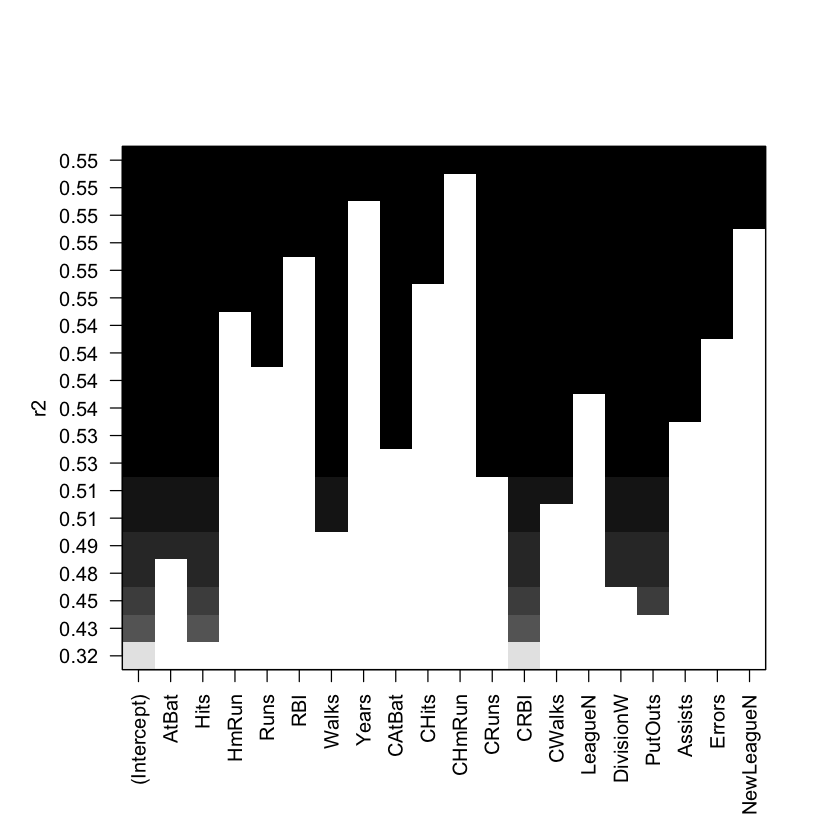

In [25]:
nvmax = 19
regfit.fwd = regsubsets(Salary ~ . , data = Hitters, nvmax = nvmax, method = "forward")
summary.regfit.fwd <- summary(regfit.fwd)

par(bg = "white")
plot(regfit.fwd, scale='r2')

In [29]:
n <- nrow(Hitters)
summary.regfit.fwd$aic <- summary.regfit.fwd$bic - log(n) * (c(1 : nvmax) + 2) + 2 * (c(1: nvmax) + 2)
p.Cp = which.min(summary.regfit.fwd$cp)
p.aic = which.min(summary.regfit.fwd$aic)
p.bic = which.min(summary.regfit.fwd$bic)

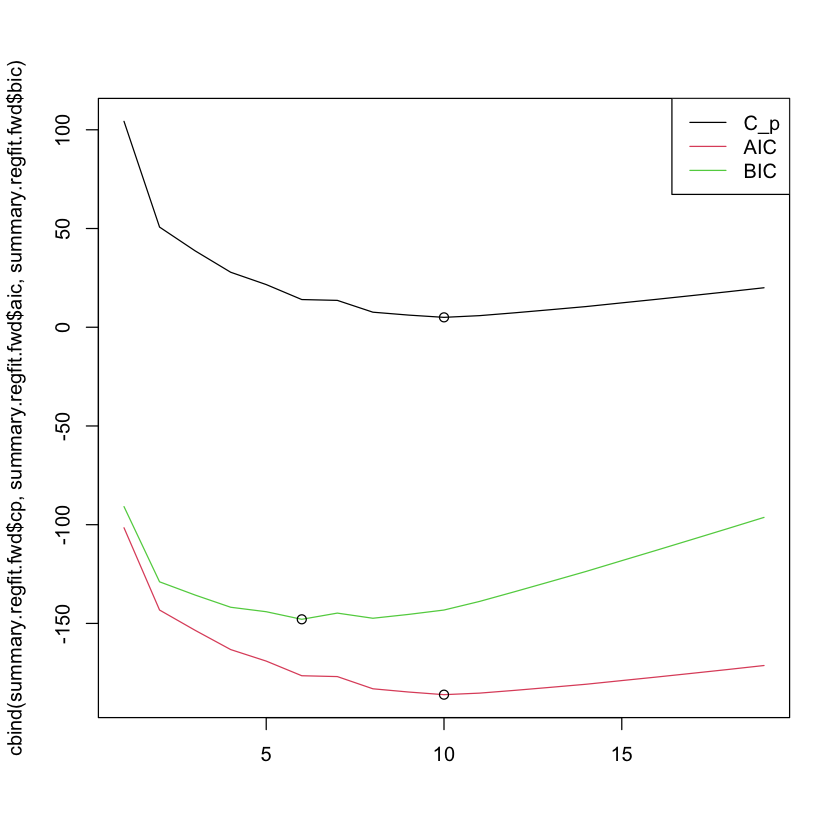

In [ ]:
par(bg = 'white')
matplot(cbind(summary.regfit.fwd$cp,summary.regfit.fwd$aic,summary.regfit.fwd$bic),type="l",lty=1)
points(c(p.Cp,p.aic,p.bic),
       c(summary.regfit.fwd$cp[p.Cp],summary.regfit.fwd$aic[p.aic],summary.regfit.fwd$bic[p.bic]))
legend("topright",c("C_p","AIC","BIC"),lty=1,col=1:3,)

In [44]:
# Hent navnene på variablene valgt av regsubsets()
vars <- names(coef(regfit.fwd, id = best_id))[-1]

# Sjekk hvilke som er dummyvariabler fra faktorer
# F.eks. hvis vars inneholder "DivisionW", erstatt med "Division"
vars[grepl("^Division", vars)] <- "Division"
vars[grepl("^League", vars)] <- "League"
vars[grepl("^NewLeague", vars)] <- "NewLeague"

# Fjern duplikater (hvis flere dummyer fra samme faktor ble med)
vars <- unique(vars)

# Lag formel
form <- as.formula(paste("Salary ~", paste(vars, collapse = " + ")))

# Fitt modellen
fit.best.aic <- lm(form, data = Hitters)
summary(fit.best.aic)



Call:
lm(formula = form, data = Hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-939.11 -176.87  -34.08  130.90 1910.55 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  162.53544   66.90784   2.429 0.015830 *  
AtBat         -2.16865    0.53630  -4.044 7.00e-05 ***
Hits           6.91802    1.64665   4.201 3.69e-05 ***
Walks          5.77322    1.58483   3.643 0.000327 ***
CAtBat        -0.13008    0.05550  -2.344 0.019858 *  
CRuns          1.40825    0.39040   3.607 0.000373 ***
CRBI           0.77431    0.20961   3.694 0.000271 ***
CWalks        -0.83083    0.26359  -3.152 0.001818 ** 
DivisionW   -112.38006   39.21438  -2.866 0.004511 ** 
PutOuts        0.29737    0.07444   3.995 8.50e-05 ***
Assists        0.28317    0.15766   1.796 0.073673 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 311.8 on 252 degrees of freedom
Multiple R-squared:  0.5405,	Adjusted R-squared:  0.5223 
F-stat

Tolkning nå: Vi har nå kun signifikante variabler, bortsett fra assists som har >5% nivå. $R^2$ er lavere, men dette er ikke nødvendigvis dårlig. $R^2$ blir større for hver variabel vi legger til, så dette kan fort overtilpasse data (fange opp støy, ikke mønster).

Vi ser at `Redisual standard error` er noe lavere nå. Vi har fått en enklere modell som er lettere å tolke. Alle variablene har akseptable signifikansnivåer. 

Videre: Vi kunne kjøre Cross Validation for AIC-modellen vs. en fullmodell for å se om den generaliserer bedre.

In [45]:
anova(fit.lm, fit.best.aic)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,243,24200700,NA,NA,NA,NA
2,252,24500402,-9,-299702,0.3343686,0.9629435


ANOVA-testen sammenligner AIC-modellen med fullmodellen og viser at det ikke er signifikant forskjell mellom dem (p ≈ 0.96). AIC-modellen, som er enklere og inneholder færre variabler, presterer dermed like godt, og er å foretrekke for tolkning og generalisering.

In [48]:
install.packages('tree')
library(tree)


The downloaded binary packages are in
	/var/folders/dp/x5lf9lp142l0p7rp61v608h00000gn/T//RtmphNJUXS/downloaded_packages


In [54]:
fit.bigtree <- tree(Salary ~ ., data = Hitters)
fit.aic.tree <- tree(form, data = Hitters)


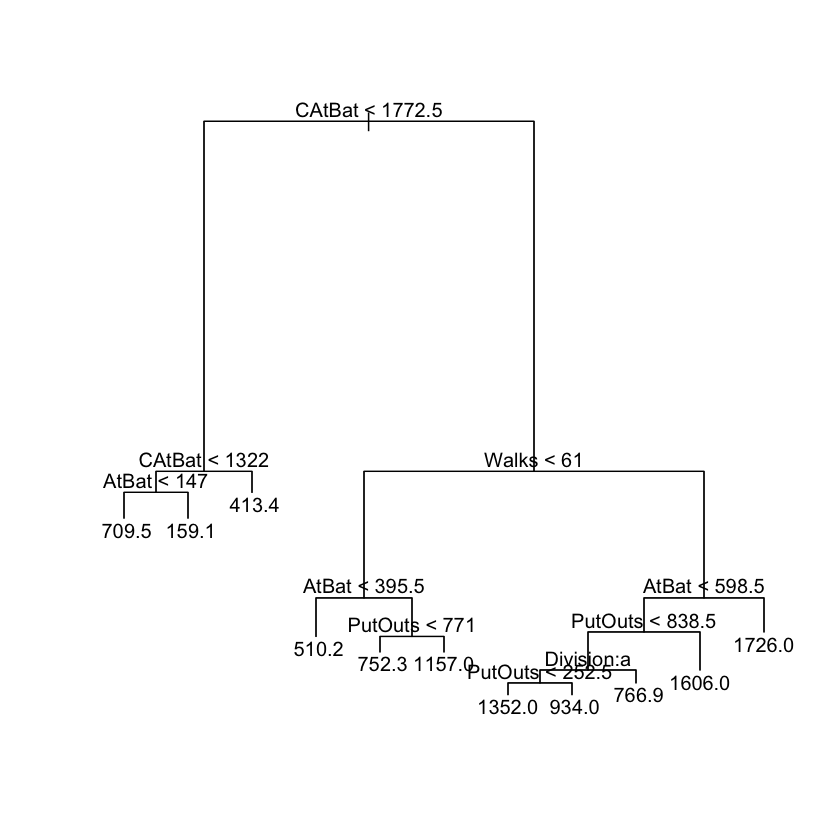

In [ ]:
par(bg = "white")
plot(fit.aic.tree)
text(fit.aic.tree)

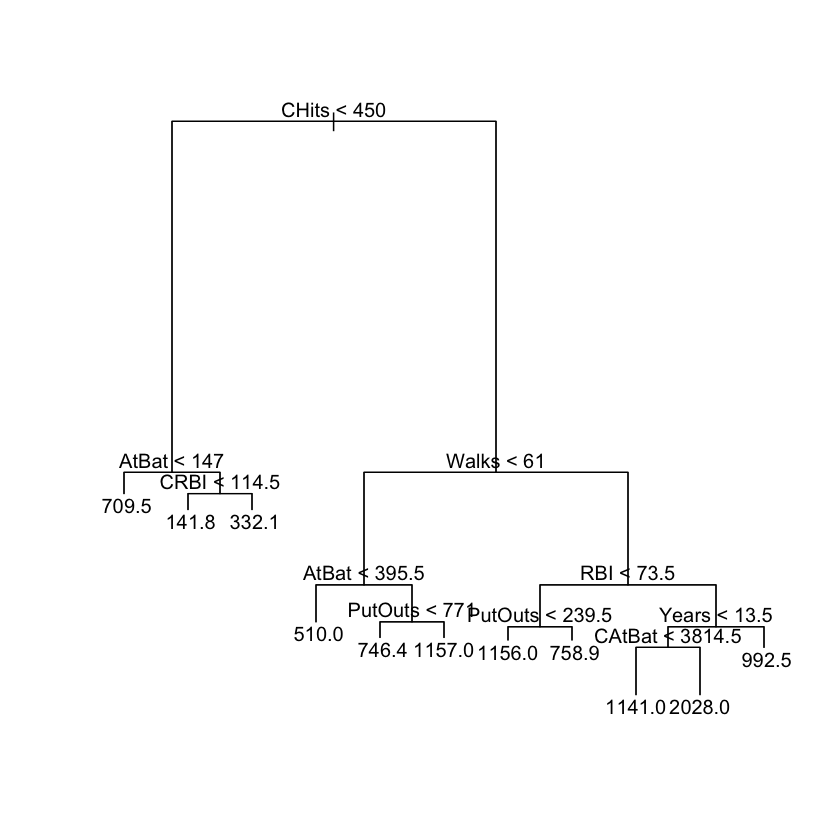

In [55]:
par(bg = "white")
plot(fit.bigtree)
text(fit.bigtree)

In [56]:
# =============================================
# E-mail spam data
# =============================================
#
# Summary: 
# Information from 4601 e-mail messages with the purpose of 
# constructing an automatic spam detector
#
# Data description: 
# The data set consists of the following 59 variables:
# Response variable:
#  y: indicator of whether the e-mail is spam True/False
# Covariates:
#  x1-x57: 57 of the most  commonly occuring words and 
#          punctuation marks in the e-mails
# Indicator of training and test sets:
#  train: indicator of whether to use as training or test sample
#
#===============================================

## Read data
spam = read.table("http://www.uio.no/studier/emner/matnat/math/STK2100/data/spam_data.txt",header=TRUE)


In [59]:
fit <- glm(y~ . -train, data = spam, family=binomial, subset=spam$train)
summary(fit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = y ~ . - train, family = binomial, data = spam, 
    subset = spam$train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.050e+00  2.987e-01  -6.865 6.66e-12 ***
x1          -1.495e+00  5.086e-01  -2.939 0.003288 ** 
x2          -1.822e-01  1.783e-01  -1.022 0.306724    
x3          -2.659e-02  2.017e-01  -0.132 0.895136    
x4           1.185e+00  3.107e+00   0.381 0.702968    
x5           1.254e+00  2.548e-01   4.923 8.52e-07 ***
x6           5.322e-01  3.435e-01   1.550 0.121259    
x7           2.010e+00  5.373e-01   3.741 0.000183 ***
x8           3.756e-01  2.468e-01   1.522 0.128048    
x9           6.010e-01  4.643e-01   1.294 0.195499    
x10          2.701e-01  1.924e-01   1.404 0.160342    
x11          9.942e-02  4.700e-01   0.212 0.832462    
x12         -1.885e-01  1.567e-01  -1.203 0.229121    
x13          1.059e-01  3.677e-01   0.288 0.773325    
x14          1.478e-01  1.842e-01   0.802 0.422356    
x15        